In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import controller
import random
import pickle
import pandas as pd
import matplotlib.pyplot as plt

BASE_SCENARIO = './ca_gb/ca_gb_cleaned_ranked.lotus'
# seed = random.random()
seed = 0.4193847805409324

In [3]:
# with open(***.pickle, 'rb') as infile:
#     *** = pickle.load(infile)

## Vary ASPA + ASPV Jointly

In [4]:
all_asns = controller.export_interpreter(BASE_SCENARIO, BASE_SCENARIO+".pickle")
df1 = controller.main(BASE_SCENARIO+".pickle", all_asns, "random_joint_aspa_aspv", verbose=False, iterations=100, usr_seed=seed)
with open("df1.pickle", "wb") as outfile:
    pickle.dump(df1, outfile)

<AxesSubplot: xlabel='Global ASPA+ASPV Deployment', ylabel='Avg. Improvement'>

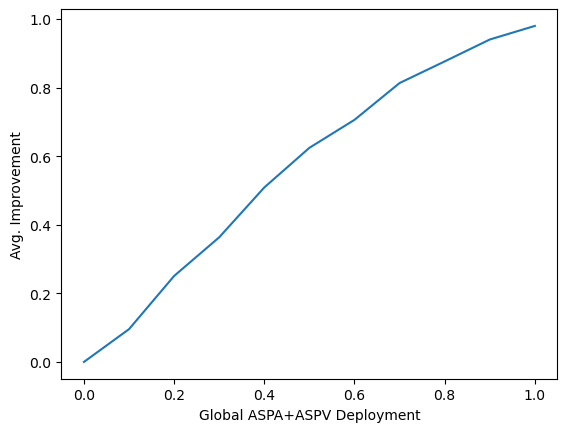

In [5]:
# with open("df1.pickle", 'rb') as infile:
#     df1 = pickle.load(infile)
m = df1.mean()
m.columns = ["Global ASPA+ASPV Deployment", "Avg. Improvement"]
m.plot(x="Global ASPA+ASPV Deployment", y="Avg. Improvement", xlabel="Global ASPA+ASPV Deployment", ylabel="Avg. Improvement")

In [6]:
all_asns = controller.export_interpreter(BASE_SCENARIO, BASE_SCENARIO+".pickle")
df2 = controller.main(BASE_SCENARIO+".pickle", all_asns, "random_joint_aspa_aspv", verbose=False, iterations=100, usr_seed=seed, aspv_level=2)
with open("df2.pickle", "wb") as outfile:
    pickle.dump(df2, outfile)

<AxesSubplot: xlabel='Global ASPA+ASPV Deployment', ylabel='Avg. Improvement'>

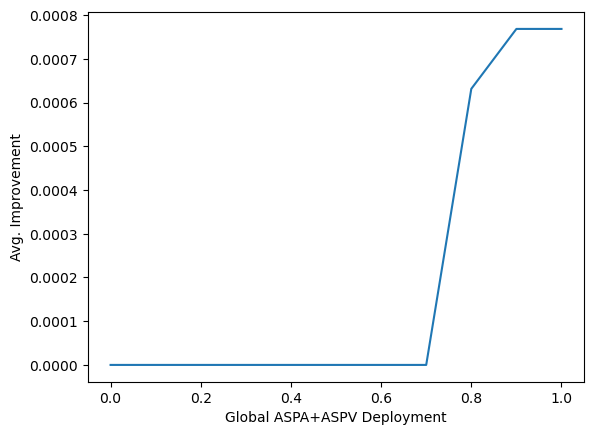

In [7]:
with open("df2.pickle", 'rb') as infile:
    df2 = pickle.load(infile)
m = df2.mean()
m.columns = ["Global ASPA+ASPV Deployment", "Avg. Improvement"]
m.plot(x="Global ASPA+ASPV Deployment", y="Avg. Improvement", xlabel="Global ASPA+ASPV Deployment", ylabel="Avg. Improvement")

In [8]:
import copy
from multiprocessing import Pool
from lotus_configurator import Lotus_configurator

all_asns = controller.export_interpreter(BASE_SCENARIO, BASE_SCENARIO+".pickle", pickle_flag=False)
with open(BASE_SCENARIO+".pickle", 'rb') as infile:
        obj = pickle.load(infile)
ls = []
p = Pool(11)
proportions = [0.0, 0.8, 0.9, 1.0]
for s in [
        # 10.419384780540932, 
        # 22.41938478054093, 
        88.41938478054092
        ]:
        scenario_gen = ((copy.deepcopy(obj), Lotus_configurator(all_asns,aspa=1,attack=1,seed=s,params={"rate":i,"aspv_level":2}), True) for i in proportions)
        changes = p.starmap(controller.run_scenario, scenario_gen)
        max_changes = changes[0]
        relative_prf = list(map(lambda x: controller.compare_to_worst(x, max_changes), changes))
        ls.append(changes)
ls

['autoASPA 22491 1']
['genAttack 54182 22491']
['autoASPA 22491 1', 'autoASPA 206024 1', 'setASPV 206024 on 2 ', 'autoASPA 43280 1', 'setASPV 43280 on 2 ', 'autoASPA 8838 1', 'setASPV 8838 on 2 ', 'autoASPA 203171 1', 'setASPV 203171 on 2 ', 'autoASPA 201289 1', 'setASPV 201289 on 2 ', 'autoASPA 14166 1', 'setASPV 14166 on 2 ', 'autoASPA 17181 1', 'setASPV 17181 on 2 ', 'autoASPA 200870 1', 'setASPV 200870 on 2 ', 'autoASPA 29017 1', 'setASPV 29017 on 2 ', 'autoASPA 55254 1', 'setASPV 55254 on 2 ', 'autoASPA 61323 1', 'setASPV 61323 on 2 ', 'autoASPA 41354 1', 'setASPV 41354 on 2 ', 'autoASPA 18721 1', 'setASPV 18721 on 2 ', 'autoASPA 397728 1', 'setASPV 397728 on 2 ', 'autoASPA 16082 1', 'setASPV 16082 on 2 ', 'autoASPA 11043 1', 'setASPV 11043 on 2 ', 'autoASPA 14663 1', 'setASPV 14663 on 2 ', 'autoASPA 46877 1', 'setASPV 46877 on 2 ', 'autoASPA 8791 1', 'setASPV 8791 on 2 ', 'autoASPA 196933 1', 'setASPV 196933 on 2 ', 'autoASPA 786 1', 'setASPV 786 on 2 ', 'autoASPA 48325 1', 'setA

[[73, 71, 70, 70]]

Deployment of ASPV 2 at 62596 led to this route hijack being ignored, going from 0.8 to 0.9 percent deployment
[
    ({'path': '62596-54182-577-22491', 'come_from': 'provider', 'LocPrf': 50, 'best_path': False},
    {'path': '62596-54182-22491', 'come_from': 'provider', 'locPrf': 50, 'network': '10.1.253.0/24'})
]


In [9]:
all_asns = controller.export_interpreter(BASE_SCENARIO, BASE_SCENARIO+".pickle")
df3 = controller.main(BASE_SCENARIO+".pickle", all_asns, "random_joint_aspa_aspv_loc_perf", verbose=False, iterations=100, usr_seed=seed, aspv_level=2)
with open("df3.pickle", "wb") as outfile:
    pickle.dump(df3, outfile)


,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
count,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.0,0.095611,0.250689,0.356275,0.497388,0.613068,0.696400,0.802231,0.866518,0.934171,0.977780
std,0.0,0.244260,0.350879,0.385581,0.413238,0.398223,0.366524,0.306106,0.270312,0.205751,0.141159
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.000000,0.022767,0.057631,0.191667,0.506148,0.711692,0.828499,0.999201,1.000000
50%,0.0,0.000000,0.057190,0.209771,0.434947,0.665525,0.934314,1.000000,1.000000,1.000000,1.000000
75%,0.0,0.056373,0.333333,0.649359,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


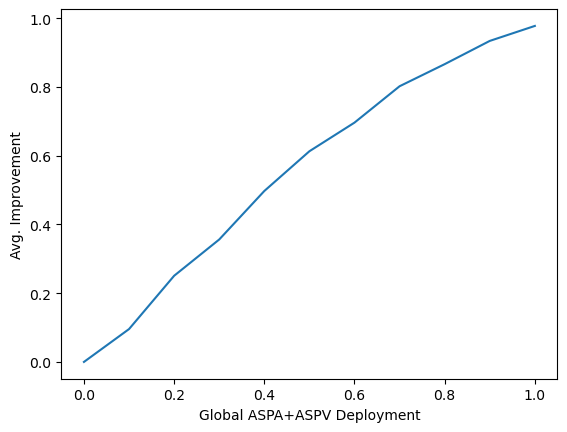

In [10]:
# with open("df3.pickle", 'rb') as infile:
#     df3 = pickle.load(infile)
m = df3.mean()
m.columns = ["Global ASPA+ASPV Deployment", "Avg. Improvement"]
m.plot(x="Global ASPA+ASPV Deployment", y="Avg. Improvement", xlabel="Global ASPA+ASPV Deployment", ylabel="Avg. Improvement")
df3.describe()

<AxesSubplot: xlabel='Global ASPA+ASPV Deployment', ylabel='Difference in Avg. Improvement'>

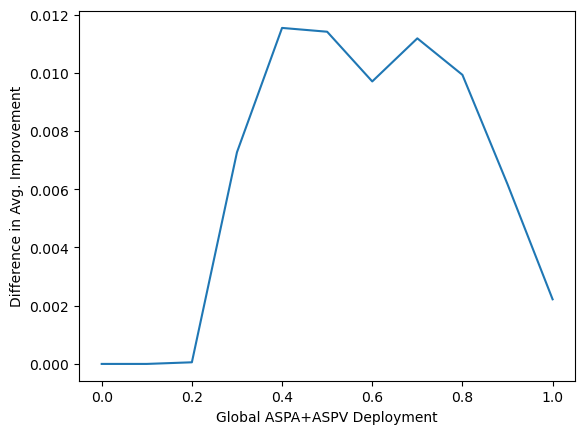

In [11]:
m = (df1 - df3).mean()
m.columns = ["Deployment", "Avg. Improvement"]
m.plot(x="Deployment", y="Avg. Improvement", xlabel="Global ASPA+ASPV Deployment", ylabel="Difference in Avg. Improvement")

# Vary ASPA and ASPV Independent of One Another

In [12]:
all_asns = controller.export_interpreter(BASE_SCENARIO, BASE_SCENARIO+".pickle", pickle_flag=True)
results_1 = controller.main(BASE_SCENARIO+".pickle", all_asns, "random_aspa_aspv", verbose=False, iterations=100, usr_seed=seed)
with open("results_1.pickle", "wb") as outfile:
    pickle.dump(results_1, outfile)
results_1

array([[0.        , 0.08497115, 0.21404584, 0.31265601, 0.44719711,
        0.54425726, 0.76494745, 0.92040476],
       [0.        , 0.14873989, 0.29632522, 0.39965324, 0.53431172,
        0.61870203, 0.80981959, 0.94193398],
       [0.        , 0.10423596, 0.25985655, 0.38905282, 0.50108081,
        0.61051007, 0.79137035, 0.94693398],
       [0.        , 0.14363905, 0.2581215 , 0.35538391, 0.46231191,
        0.55995118, 0.76347992, 0.94693398],
       [0.        , 0.17539903, 0.32325659, 0.43178405, 0.53078685,
        0.60830643, 0.83204833, 0.94693398],
       [0.        , 0.14433501, 0.24667565, 0.36599447, 0.48211213,
        0.64271035, 0.82701618, 0.95192637],
       [0.        , 0.12869237, 0.32676036, 0.46813376, 0.55743757,
        0.66368087, 0.89014765, 0.96483607],
       [0.        , 0.15464757, 0.28031578, 0.43158826, 0.58866594,
        0.71975482, 0.89581383, 0.98      ]])

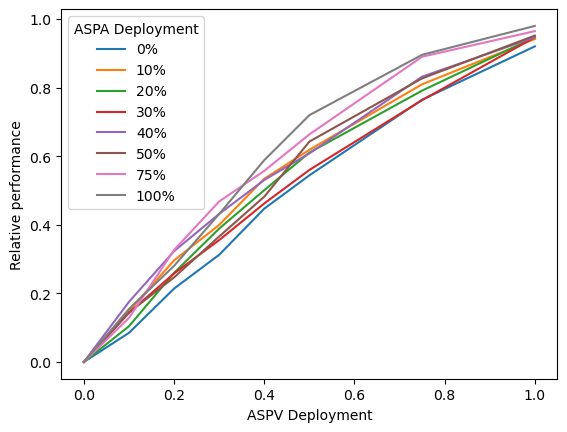

In [13]:
# with open("results_1.pickle", 'rb') as infile:
#     results_1 = pickle.load(infile)
labels=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 1.0]
df = pd.DataFrame(results_1, columns=labels)
for i in range(df.shape[1]):
       plt.plot(df.iloc[i], label=f"{int(labels[i]*100)}%")
plt.legend(title="ASPA Deployment")
plt.ylabel("Relative performance")
plt.xlabel("ASPV Deployment")
plt.show()

In [14]:
all_asns = controller.export_interpreter(BASE_SCENARIO, BASE_SCENARIO+".pickle")
results_2 = controller.main(BASE_SCENARIO+".pickle", all_asns, "random_aspa_aspv", verbose=False, iterations=100, usr_seed=seed, aspv_level=2)
with open("results_2.pickle", "wb") as outfile:
    pickle.dump(results_2, outfile)

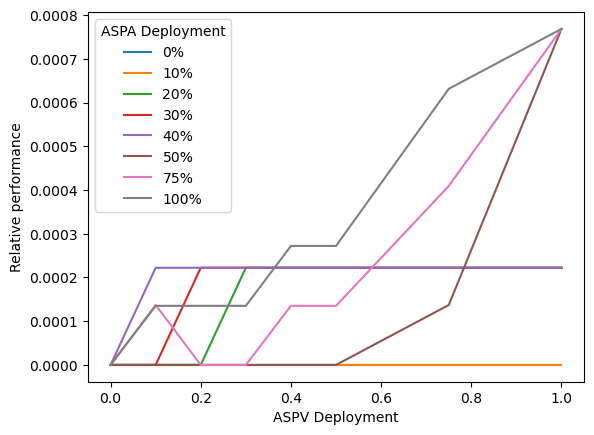

In [15]:
# with open("results_2.pickle", 'rb') as infile:
#     results_2 = pickle.load(infile)
labels=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 1.0]
df = pd.DataFrame(results_2, columns=labels)
for i in range(df.shape[1]):
       plt.plot(df.iloc[i], label=f"{int(labels[i]*100)}%")
plt.legend(title="ASPA Deployment")
plt.ylabel("Relative performance")
plt.xlabel("ASPV Deployment")
plt.show()

## Varying ASPA + ASPV and ASPV level

In [16]:
all_asns = controller.export_interpreter(BASE_SCENARIO, BASE_SCENARIO+".pickle")
vary_aspv_level = controller.main(BASE_SCENARIO+".pickle", all_asns, "random_joint_aspa_aspv_level", verbose=False, iterations=100, usr_seed=seed)
with open("vary_aspv_level.pickle", "wb") as outfile:
    pickle.dump(vary_aspv_level, outfile)

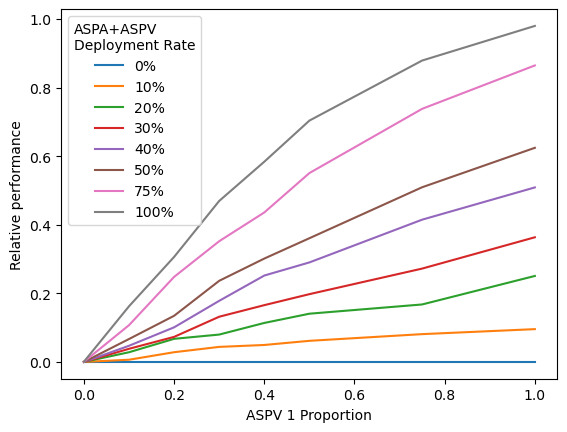

In [17]:
# with open("vary_aspv_level.pickle", 'rb') as infile:
#     vary_aspv_level = pickle.load(infile)
labels=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 1.0]
df = pd.DataFrame(vary_aspv_level, columns=labels)
for i in range(df.shape[1]):
       plt.plot(df.iloc[i], label=f"{int(labels[i]*100)}%")
plt.legend(title="ASPA+ASPV\nDeployment Rate")
plt.ylabel("Relative performance")
plt.xlabel("ASPV 1 Proportion")
plt.show()

In [18]:
all_asns = controller.export_interpreter(BASE_SCENARIO, BASE_SCENARIO+".pickle")
vary_aspv_level_loc_prf = controller.main(BASE_SCENARIO+".pickle", all_asns, "random_joint_aspa_aspv_level_loc_prf", verbose=False, iterations=100, usr_seed=seed)
with open("vary_aspv_level_loc_prf.pickle", "wb") as outfile:
    pickle.dump(vary_aspv_level_loc_prf, outfile)

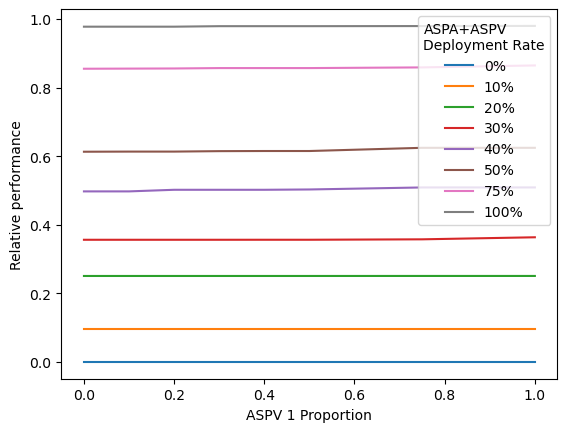

In [19]:
# with open("vary_aspv_level_loc_prf.pickle", 'rb') as infile:
#     vary_aspv_level_loc_prf = pickle.load(infile)
labels=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 1.0]
df = pd.DataFrame(vary_aspv_level_loc_prf, columns=labels)
for i in range(df.shape[1]):
       plt.plot(df.iloc[i], label=f"{int(labels[i]*100)}%")
plt.legend(title="ASPA+ASPV\nDeployment Rate")
plt.ylabel("Relative performance")
plt.xlabel("ASPV 1 Proportion")
plt.show()

## Targeted Attack/Defense

In [20]:
all_asns = controller.export_interpreter(BASE_SCENARIO, BASE_SCENARIO+".pickle")
international_defense = controller.main(BASE_SCENARIO+".pickle", all_asns, "international_defense", verbose=False, iterations=100, usr_seed=seed)
with open("international_defense.pickle", "wb") as outfile:
    pickle.dump(international_defense, outfile)

<AxesSubplot: xlabel='National ASPA+ASPV Deployment', ylabel='Avg. Improvement'>

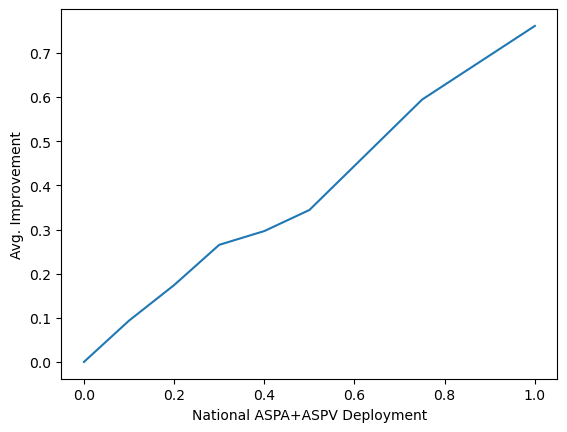

In [21]:
# with open("international_defense.pickle", 'rb') as infile:
#     international_defense = pickle.load(infile)
m = international_defense.mean()
m.columns = ["National ASPA+ASPV Deployment", "Avg. Improvement"]
m.plot(x="National ASPA+ASPV Deployment", y="Avg. Improvement", xlabel="National ASPA+ASPV Deployment", ylabel="Avg. Improvement")

In [22]:
all_asns = controller.export_interpreter(BASE_SCENARIO, BASE_SCENARIO+".pickle")
international_defense_aspv_level = controller.main(BASE_SCENARIO+".pickle", all_asns, "international_defense_aspv_level", verbose=False, iterations=100, usr_seed=seed)
with open("international_defense_aspv_level.pickle", "wb") as outfile:
    pickle.dump(international_defense_aspv_level, outfile)

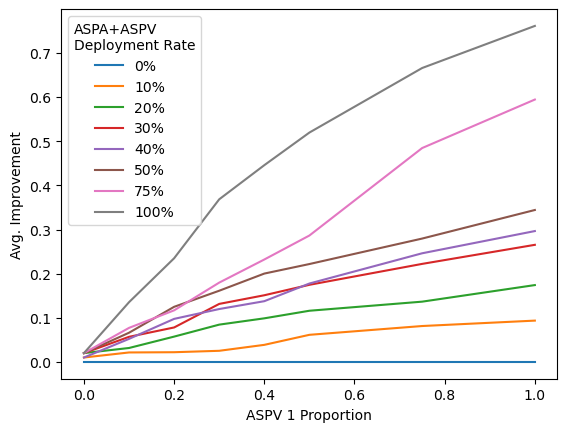

In [23]:
# with open("international_defense_aspv_level.pickle", 'rb') as infile:
#     international_defense_aspv_level = pickle.load(infile)
labels=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 1.0]
df = pd.DataFrame(international_defense_aspv_level, columns=labels)
for i in range(df.shape[1]):
       plt.plot(df.iloc[i], label=f"{int(labels[i]*100)}%")
plt.legend(title="ASPA+ASPV\nDeployment Rate")
plt.ylabel("Avg. Improvement")
plt.xlabel("ASPV 1 Proportion")
plt.show()